In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [113]:
# load raw data
df = pd.read_csv('database.csv')

### Clean the dataset and remove reviews that don't contain the keywords

In [114]:
class ProcessReviews:

    def __init__(self, df: pd.DataFrame):
        self.df = df

    def check_keywords(self):
        """
        adds a column for each keyword.
        0 - the review does not contain the keyword
        1 - the review contains the keyword
        """
        self.df['acne'] = self.df.review_text.str.contains('acne|break.out|breakout|pimple|zit', flags=re.IGNORECASE,
                                                           regex=True).astype(int)
        self.df['blackheads'] = self.df.review_text.str.contains('blackhead|clogged pores', flags=re.IGNORECASE,
                                                                 regex=True).astype(int)
        self.df['dry_skin'] = self.df.review_text.str.contains('dry|irritate|tight|soothing|uncomfortable',
                                                               flags=re.IGNORECASE, regex=True).astype(int)
        self.df['rosacea'] = self.df.review_text.str.contains('rosacea|apparent blood vessels|dialated vessels',
                                                              flags=re.IGNORECASE, regex=True).astype(int)
        self.df['irritated_skin'] = self.df.review_text.str.contains(
            'redness|red.skin|inflam|itch|irritat|sooth|painful|calm|rash', flags=re.IGNORECASE, regex=True).astype(int)
        self.df['atopic_dermatitis'] = self.df.review_text.str.contains('atopic.dermatitis|topic.skin|eczema',
                                                                        flags=re.IGNORECASE, regex=True).astype(int)
        self.df['psoriasis'] = self.df.review_text.str.contains('psoriasis', flags=re.IGNORECASE, regex=True).astype(
            int)
        self.df['sensitive_skin'] = self.df.review_text.str.contains('sensitive|allerg|rash', flags=re.IGNORECASE,
                                                                     regex=True).astype(int)
        self.df['oily_skin'] = self.df.review_text.str.contains('oily|shiny|sebum', flags=re.IGNORECASE,
                                                                regex=True).astype(int)
        self.df['pigmentation'] = self.df.review_text.str.contains('pigment|dark spots|sun.spots|sunspots|acne.scars',
                                                                   flags=re.IGNORECASE, regex=True).astype(int)

    def clean(self) -> pd.DataFrame:
        # remove empty reviews
        self.df.dropna(subset=['review_body', 'review_title'], inplace=True)


        # join the title and the body of the reviews
        self.df['review_text'] = self.df['review_title'] + ' ' + self.df['review_body']
        self.df.drop(columns=['review_body', 'review_title'], inplace=True)

        # remove non-alphanumeric characters from the product name
        self.df['product_name'] = self.df['product_name'].str.replace('[^\w\s]', '').str.split().str.join(' ')

        # check which reviews contain the keywords
        self.check_keywords()

        # keep only the reviews that contain at least one keyword
        num_kw = 10
        self.df = self.df.loc[(self.df.iloc[:, -num_kw:] != 0).any(axis=1)]

        # order reviews alphabetically by product and reviews
        self.df = self.df.sort_values(['product_name', 'review_title']).reset_index(drop=True)

        return self.df

In [115]:
process = ProcessReviews(df)
reviews = process.clean()
reviews.head()

C:\Users\Ayala\anaconda3\envs\web_scraping\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: The default value of regex will change from True to False in a future version.


,product_name,product_url,product_ingredients,rating,review_text,acne,blackheads,dry_skin,rosacea,irritated_skin,atopic_dermatitis,psoriasis,sensitive_skin,oily_skin,pigmentation
0,10 Benzoyl Peroxide Acne Bar,https://www.amazon.com/111MedCo-Acne-Treatment...,"10% Benzoyl Peroxide,",2.0,Not worth it I tried out this product along wi...,1,0,0,0,0,0,0,0,0,0
1,10 Benzoyl Peroxide Acne Bar,https://www.amazon.com/111MedCo-Acne-Treatment...,"10% Benzoyl Peroxide,",5.0,"10/10 Y’all , buy this!!! I received it yester...",1,0,0,0,0,0,0,0,0,0
2,10 Benzoyl Peroxide Acne Bar,https://www.amazon.com/111MedCo-Acne-Treatment...,"10% Benzoyl Peroxide,",5.0,Really works 🙂 Cons: unscented so it kinda sme...,1,0,0,0,0,0,0,0,0,0
3,10 Benzoyl Peroxide Acne Bar,https://www.amazon.com/111MedCo-Acne-Treatment...,"10% Benzoyl Peroxide,",2.0,Works but many negatives The soap does remove ...,1,0,1,0,0,0,0,0,0,0
4,10 Benzoyl Peroxide Acne Bar,https://www.amazon.com/111MedCo-Acne-Treatment...,"10% Benzoyl Peroxide,",5.0,Great product Although it didn’t completely cl...,1,0,0,0,0,0,0,1,0,0


In [116]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         5322 non-null   object 
 1   product_url          5322 non-null   object 
 2   product_ingredients  4391 non-null   object 
 3   rating               5322 non-null   float64
 4   review_text          5322 non-null   object 
 5   acne                 5322 non-null   int32  
 6   blackheads           5322 non-null   int32  
 7   dry_skin             5322 non-null   int32  
 8   rosacea              5322 non-null   int32  
 9   irritated_skin       5322 non-null   int32  
 10  atopic_dermatitis    5322 non-null   int32  
 11  psoriasis            5322 non-null   int32  
 12  sensitive_skin       5322 non-null   int32  
 13  oily_skin            5322 non-null   int32  
 14  pigmentation         5322 non-null   int32  
dtypes: float64(1), int32(10), object(4)
me

Note that some products are missing the ingredients' information.
In general, it's probably best to take the ingredients from a more reliable source than amazon.

In [117]:
reviews.describe(include='object')

,product_name,product_url,product_ingredients,review_text
count,5322,5322,4391,5322
unique,163,164,80,5316
top,Vanicream Cleansing Bar Fragrance Free 39 OzP...,https://www.amazon.com/Vanicream-Cleansing-Fra...,"sodium cocoyl isethionate, stearic acid, water...",Heavenly product I love this stuff. It heats u...
freq,552,552,552,3


In [118]:
reviews.groupby('product_name')['rating'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
product_name,,,,,,,,
Vanicream Cleansing Bar Fragrance Free 39 OzPack 3 Pack,552.0,4.777174,0.673038,1.0,5.0,5.0,5.0,5.0
CETAPHIL Gentle Cleansing Bar 45 oz Bar Pack of 6 Nourishing Cleansing Bar For Dry Sensitive Skin NonComedogenic Dermatologist Recommended Brand Packaging May Vary,385.0,4.327273,1.381390,1.0,5.0,5.0,5.0,5.0
Oatmeal Soap Bar With Organic Raw Honey Goats Milk Organic Shea Butter Can Be Used as a Face Soap or All Over Body Soap Exfoliating Soap 4oz Bar,256.0,4.574219,1.010901,1.0,5.0,5.0,5.0,5.0
Keika Charcoal Black Soap Bar for Acne Eczema Psoriasis Face Body Men Women Teens with Oily Skin 5 oz,253.0,4.557312,1.024344,1.0,5.0,5.0,5.0,5.0
Aloe Vera Calendula Soap Natural Organic Ingredients With Organic Aloe Vera Calendula Turmeric Use As a Face Soap Body Soap or Shaving Soap Aloe Vera Calendula 1 Pack,217.0,4.631336,0.987203,1.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Aquation Hydrating 1 Piece Cleansing Bar 45 Ounce,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Palmers Skin Success AntiDark Spot Complexion Bar 350 oz Pack of 5,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Panrosa 35 OZ Rose Essential Oil Bar Soap For Face and Body Pack of 6 Moisturizing Soap Bar for Men and Women Made In USA Rose Pack of 6,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


There are 163 unique products in the database that contain referance to the keywords.

<AxesSubplot:xlabel='rating', ylabel='Count'>

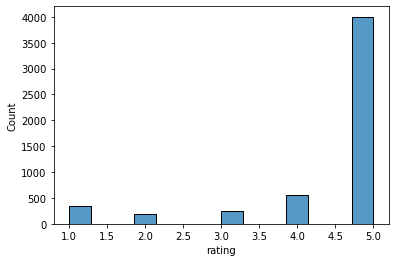

In [119]:
# the ratings distribution
sns.histplot(data=reviews, x='rating')

In [120]:
reviews.rating.value_counts(normalize=True)

5.0    0.751973
4.0    0.105036
1.0    0.062946
3.0    0.044720
2.0    0.035325
Name: rating, dtype: float64

Surprisingly, most of the reviewers give a 5-star rating. I suspect false reviews here.

### check how many times each condition appears in the reviews:

In [121]:
reviews.iloc[:, -10:].sum()

acne                 1446
blackheads             84
dry_skin             2372
rosacea                89
irritated_skin       1368
atopic_dermatitis     374
psoriasis              88
sensitive_skin       2014
oily_skin             489
pigmentation          195
dtype: int64

In [122]:
def condition_barplot(condition_df):

    stat = condition_df.sum().reset_index()

    plt.figure(figsize=(8, 4), dpi=100)
    plt.xticks(rotation=45)
    sns.barplot(x=stat.iloc[:, 0], y=stat.iloc[:, 1])
    plt.show()

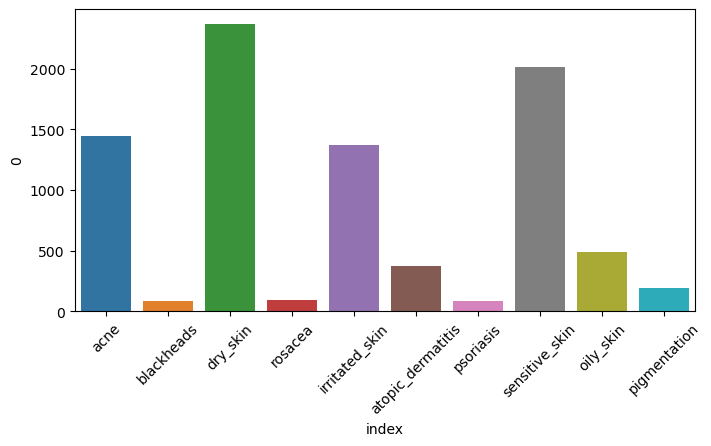

In [123]:
condition_barplot(reviews.iloc[:, -10:])

### Check the rating distribution for each skin condition

In [124]:
def pie_condition_rating(df):
    plt.figure(figsize=(12,24), dpi=100)
    for i, name in enumerate(df.columns[-10:]):
        ax = plt.subplot(5, 2, i+1)
        df[df[name] == 1]['rating'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10, label="", title=name)

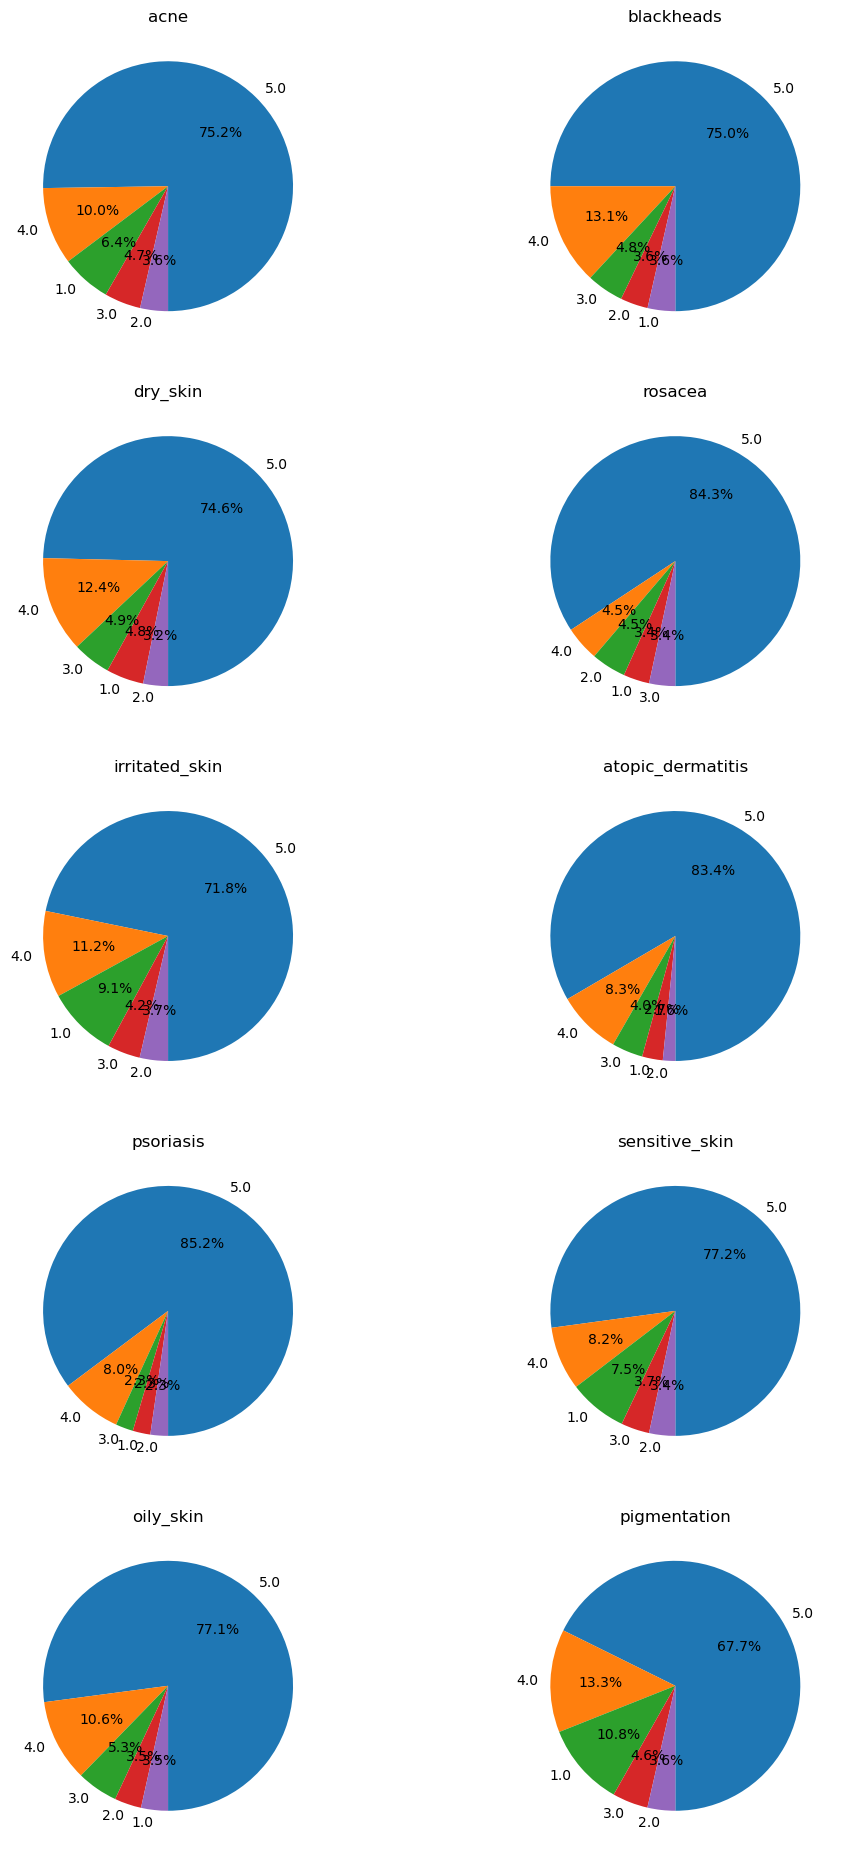

In [125]:
pie_condition_rating(reviews)

## Inspect the product with the most reviews:

In [126]:
common_product_name = reviews.groupby('product_name')['rating'].describe().sort_values('count', ascending=False).index[0]
print(common_product_name)
one_product = reviews[reviews['product_name']==common_product_name]

Vanicream Cleansing Bar Fragrance Free  39 OzPack 3 Pack


<AxesSubplot:xlabel='rating', ylabel='Count'>

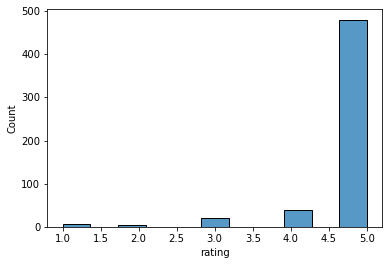

In [127]:
sns.histplot(data=one_product, x='rating')

In [128]:
one_product.iloc[:, -10:].sum()

acne                  52
blackheads             0
dry_skin             217
rosacea                7
irritated_skin       172
atopic_dermatitis     95
psoriasis              3
sensitive_skin       360
oily_skin             13
pigmentation           1
dtype: int64

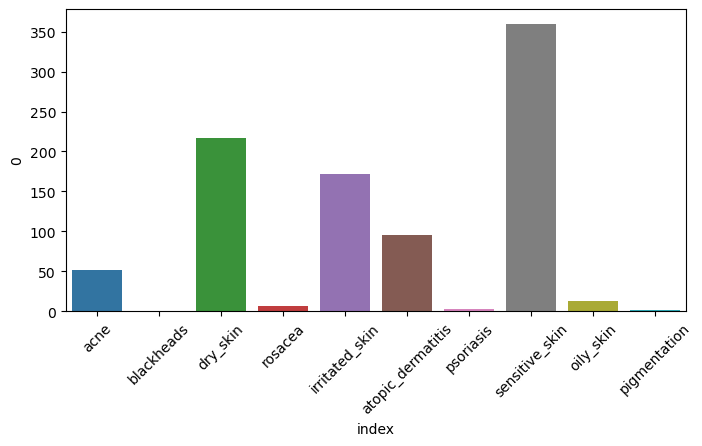

In [129]:
condition_barplot(one_product.iloc[:, -10:])

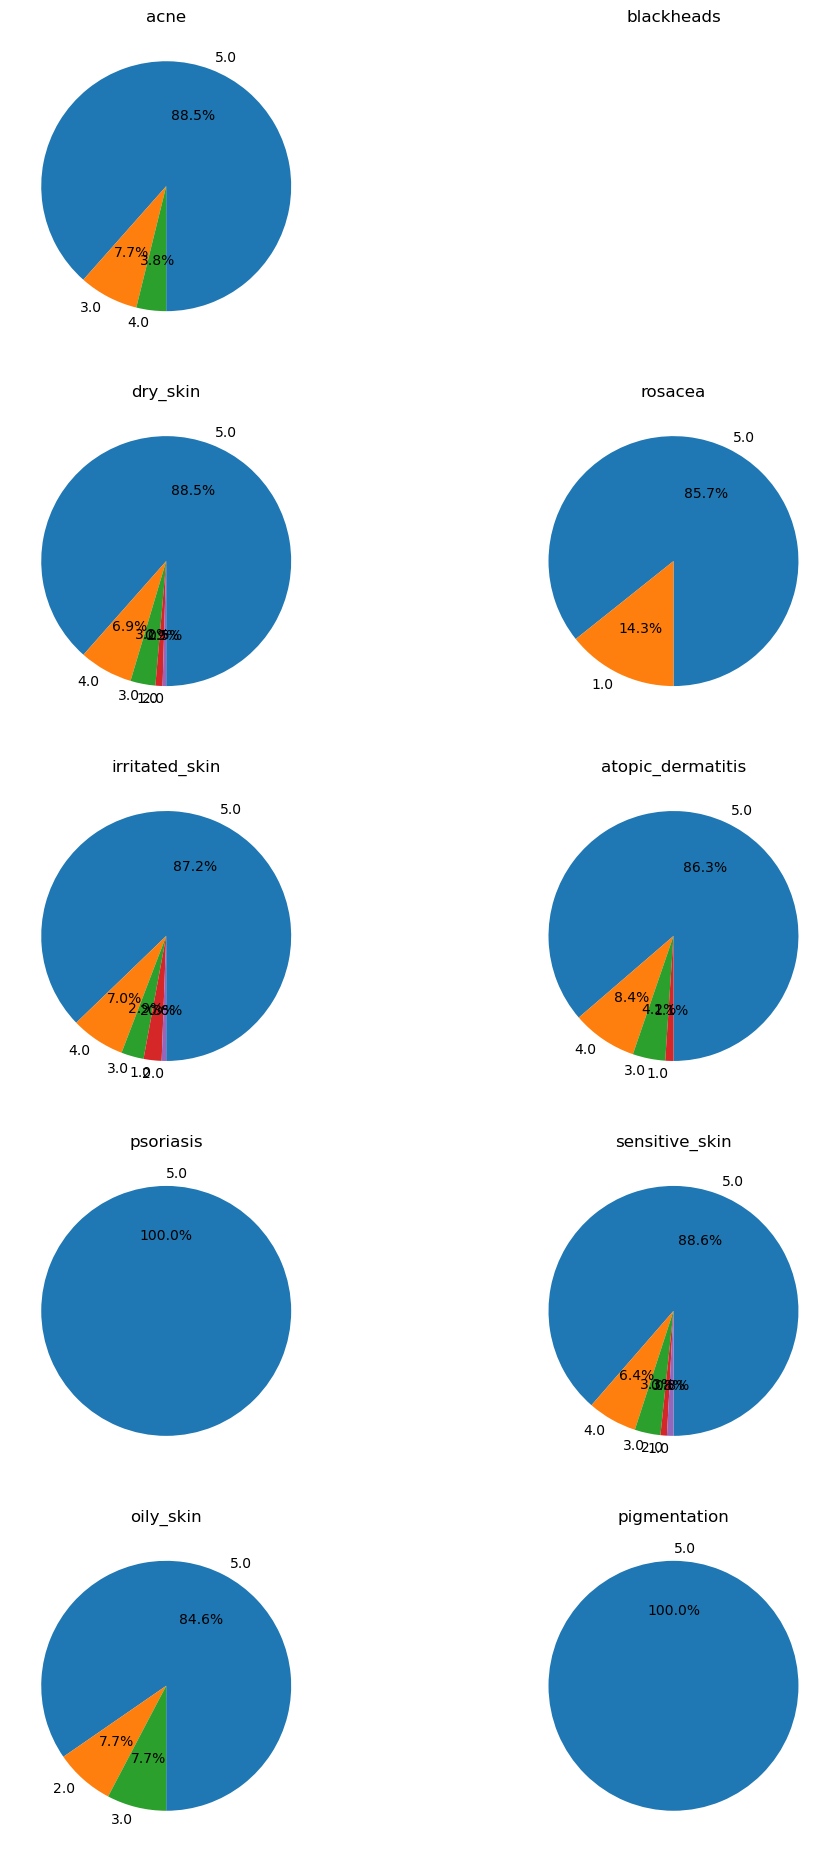

In [130]:
pie_condition_rating(one_product)

In [131]:
one_product.iloc[:, -10:].sum(axis=1).value_counts(normalize=True)

1    0.554348
2    0.278986
3    0.119565
4    0.039855
5    0.007246
dtype: float64

Half of the reviews mention only one skin condition, but a surprising amount mentions several, so keep the overlap in mind.

## Write reviews to a file readable by AWS comprehend
One file per product, one review per line.

In [132]:
def write_reviews(df):
    # combine all reviews for a single product (separated by \n)
    agg_reviews = df.groupby('product_name')['review_text'].agg(lambda x: '\n'.join(x))

    # replace spaces with "_" in the product name:
    agg_reviews.index = agg_reviews.index.str.split().str.join('_')

    # Write reviews to a file readable by AWS comprehend. One file per product, one review per line.
    for index, value in agg_reviews.items():
        with open(f"{index}.txt", 'w', encoding='utf-8') as f:
            f.write(value)

In [133]:
write_reviews(reviews)

## Analyze the result of the targeted sentiment analysis done for one product:

In [134]:
output = pd.read_json('10_Benzoyl_Peroxide_Acne_Bar.jsonl', lines=True).explode('Entities')

In [135]:
output = output.dropna()

In [136]:
output

,Entities,File,Line
0,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,0
0,"{'DescriptiveMentionIndex': [0, 1], 'Mentions'...",10_Benzoyl_Peroxide_Acne_Bar.txt,0
0,"{'DescriptiveMentionIndex': [1], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,0
0,"{'DescriptiveMentionIndex': [2, 4], 'Mentions'...",10_Benzoyl_Peroxide_Acne_Bar.txt,0
0,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,0
...,...,...,...
173,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,173
173,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,173
173,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,173
173,"{'DescriptiveMentionIndex': [0], 'Mentions': [...",10_Benzoyl_Peroxide_Acne_Bar.txt,173


In [137]:
first_review = output.loc[0, 'Entities'].values # there are 10 entities there
pd.DataFrame(first_review[2]['Mentions']) # all 3 appearances of the third entity found in the first review. Each appearance has its own sentiment.

,BeginOffset,EndOffset,Score,GroupScore,Text,Type,MentionSentiment
0,57,59,0.999690,0.512492,it,OTHER,"{'Sentiment': 'NEUTRAL', 'SentimentScore': {'M..."
1,18,22,0.998538,1.000000,this,OTHER,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
2,37,39,0.998322,0.999013,it,OTHER,"{'Sentiment': 'NEUTRAL', 'SentimentScore': {'M..."


The output file is not user-friendly at all. You need to dig endlessly through nested lists and dictionaries, and it finds a lot of other non-relevant entities that make it more cumbersome.

## Targeted Sentiment Analysis with the NewsSentiment package

In [138]:
from NewsSentiment import TargetSentimentClassifier
tsc = TargetSentimentClassifier()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [139]:
# one test review
text = one_product[one_product.acne == 1]['review_text'].iloc[0]
text

'Vanicream Cleansing Bar Recommended by my dermatologist - best soap for your face with no breakouts or irritation.'

In [140]:
re.findall('acne|break.out|breakout|pimple|zit', text, flags=re.IGNORECASE)

['breakout']

In [141]:
sentiment = tsc.infer_from_text(left="Worked wonders for my complexion. Great for shaving too I am a guy. I have highly acne prone oily skin and have for years now. I usually have at least one major ", target="zit/pimple", right=" a week in recent months/years. I have been using this to clean my face for about a month and a half now and my weekly major zit/pimple problem is nearly gone and my skin looks healthier now than it has since before I started puberty. I went from having unevenly toned okay/average skin with some acne to even and glowing skin with almost no acne. I have not changed any part of my regimen other than using this soap vs other liquid soaps and scrubs. I wouldn't expect these kinds of results for everyone of course, but if you have tried pretty much everything else I would give this a shot.Other notes:- Lathers well and leaves skin feeling soft/slick after rinsing. Good for shaving I've found.- Water makes it get soft unusually quickly. Fine for me, but it may be a problem for people that don't have or want to make space for a dedicated container/cup.")
print(sentiment[0])

C:\Users\Ayala\anaconda3\envs\web_scraping\lib\site-packages\transformers\tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


{'class_id': 2, 'class_label': 'positive', 'class_prob': 0.4206183850765228}


In [142]:
sentiment = tsc.infer_from_text(left="Worked wonders for my complexion. Great for shaving too I am a guy. I have highly acne prone oily skin and have for years now. I usually have at least one major zit/pimple a week in recent months/years. I have been using this to clean my face for about a month and a half now and my weekly major ", target="zit/pimple", right=" problem is nearly gone and my skin looks healthier now than it has since before I started puberty. I went from having unevenly toned okay/average skin with some acne to even and glowing skin with almost no acne. I have not changed any part of my regimen other than using this soap vs other liquid soaps and scrubs. I wouldn't expect these kinds of results for everyone of course, but if you have tried pretty much everything else I would give this a shot.Other notes:- Lathers well and leaves skin feeling soft/slick after rinsing. Good for shaving I've found.- Water makes it get soft unusually quickly. Fine for me, but it may be a problem for people that don't have or want to make space for a dedicated container/cup.")
print(sentiment[0])

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


{'class_id': 2, 'class_label': 'positive', 'class_prob': 0.4206183850765228}


Gives the same result for both instances, so we can just choose the first one.

In [143]:
sentiment = tsc.infer_from_text(left="Worked wonders for my complexion. Great for shaving too I am a guy. I have highly ", target="acne", right=" prone oily skin and have for years now. I usually have at least one major zit/pimple a week in recent months/years. I have been using this to clean my face for about a month and a half now and my weekly major zit/pimple problem is nearly gone and my skin looks healthier now than it has since before I started puberty. I went from having unevenly toned okay/average skin with some acne to even and glowing skin with almost no acne. I have not changed any part of my regimen other than using this soap vs other liquid soaps and scrubs. I wouldn't expect these kinds of results for everyone of course, but if you have tried pretty much everything else I would give this a shot.Other notes:- Lathers well and leaves skin feeling soft/slick after rinsing. Good for shaving I've found.- Water makes it get soft unusually quickly. Fine for me, but it may be a problem for people that don't have or want to make space for a dedicated container/cup.")
print(sentiment[0])

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


{'class_id': 0, 'class_label': 'negative', 'class_prob': 0.4251162111759186}


In [144]:
sentiment = tsc.infer_from_text(left="Worked wonders for my complexion. Great for shaving too I am a guy. I have highly acne prone oily skin and have for years now. I usually have at least one major zit/pimple a week in recent months/years. I have been using this to clean my face for about a month and a half now and my weekly major zit/pimple problem is nearly gone and my skin looks healthier now than it has since before I started puberty. I went from having unevenly toned okay/average skin with some acne to even and glowing skin with almost no ", target="acne", right=". I have not changed any part of my regimen other than using this soap vs other liquid soaps and scrubs. I wouldn't expect these kinds of results for everyone of course, but if you have tried pretty much everything else I would give this a shot.Other notes:- Lathers well and leaves skin feeling soft/slick after rinsing. Good for shaving I've found.- Water makes it get soft unusually quickly. Fine for me, but it may be a problem for people that don't have or want to make space for a dedicated container/cup.")
print(sentiment[0])

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


{'class_id': 0, 'class_label': 'negative', 'class_prob': 0.4273994266986847}


Gives a more logical negative sentiment, but slightly different between instances

In [145]:
text = "Worked wonders for my complexion. Great for shaving too I am a guy. I have highly acne prone oily skin and have for years now. I usually have at least one major zit/pimple a week in recent months/years. I have been using this to clean my face for about a month and a half now and my weekly major zit/pimple problem is nearly gone and my skin looks healthier now than it has since before I started puberty. I went from having unevenly toned okay/average skin with some acne to even and glowing skin with almost no acne. I have not changed any part of my regimen other than using this soap vs other liquid soaps and scrubs. I wouldn't expect these kinds of results for everyone of course, but if you have tried pretty much everything else I would give this a shot.Other notes:- Lathers well and leaves skin feeling soft/slick after rinsing. Good for shaving I've found.- Water makes it get soft unusually quickly. Fine for me, but it may be a problem for people that don't have or want to make space for a dedicated container/cup."

It seems that targeted sentiment analysis is very problematic, since it understandably gives a negative sentiment to the skin condition (it's mentioned as a bad thing in the review), but the review itself is positive, since the product addressed the problem.